In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from collections import defaultdict

## Helper Functions

In [2]:
def e_greedy_policy(epsilon, action_values):
    if np.random.random() < epsilon:
        return env.action_space.sample()
    else:
        action = np.argmax(action_values)
    return action

def run_episode(Q, epsilon, max_t=10000, render=False):
    trajectory = []
    state = tuple(np.round(env.reset()*[10, 100], 0))
    for t in range(max_t):
        if render:
            env.render()
        action = e_greedy_policy(epsilon, Q[state])
        next_state, reward, done, info = env.step(action)
        next_state = tuple(np.round(next_state*[10, 100], 0))
        trajectory.append((state,action,reward))
        state = next_state
        if done:
            break
    states, actions, rewards = zip(*trajectory)
    return states, actions, rewards

# Learning Algorithms

## Q-Learning

In [3]:
def Q_Learning(env, num_episodes, n_avg, alpha, EPSILON, gamma, epsilon_final=0.05, decay_rate=1, decay_threshold=1000000, max_t=10000):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    episode_rewards = [] 
    rolling_avg = []
    epsilon = EPSILON
    decay_epsilon = False

    for i_episode in range(num_episodes):
        state = tuple(np.round(env.reset()*[10, 100], 0))
        reward_sum = 0
        for t in range(max_t):
            action = e_greedy_policy(epsilon, Q[state])
            next_state, reward, done, info = env.step(action)
            next_state = tuple(np.round(next_state*[10, 100], 0))
            reward_sum += reward
            Q[state][action] = Q[state][action] + alpha*(reward + gamma*np.max(Q[next_state]) - Q[state][action])
            state = next_state
            if done:
                if reward_sum >= decay_threshold: 
                    decay_epsilon = True
                break
        episode_rewards.append(reward_sum)
        
        if decay_epsilon:
            epsilon = max(epsilon*decay_rate, epsilon_final)
        
        if i_episode > n_avg:
            rolling_avg.append(np.mean(episode_rewards[-n_avg:]))

    return episode_rewards, Q, rolling_avg

# Part 3: Mountain Car

In [4]:
env = gym.make("MountainCar-v0")
env.seed(0)
np.random.seed(0)

3. Implement tabular Q-Learning to solve the Mountain Car task in OpenGym.

In [5]:
num_episodes = 5000
alpha = 0.1
epsilon = 0.90
gamma = 0.99
n_avg = 100

Q_Learning_rewards, Q_Learning_q, Q_Learning_avgs = Q_Learning(env, num_episodes, n_avg, alpha, epsilon, gamma
                                                                           , epsilon_final=0.05, decay_rate=0.995, decay_threshold=-200.0)

In [6]:
total_rewards = []
for i in range(10):
    states, actions, rewards = run_episode(Q_Learning_q, 0, 200, True)
    total_rewards.append(sum(rewards))
env.close()
print(np.mean(total_rewards))

-150.9


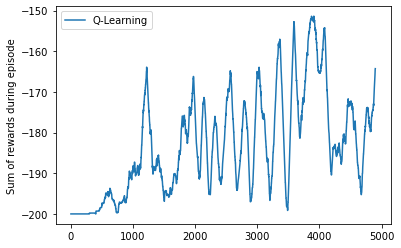

In [7]:
plt.plot(Q_Learning_avgs, label='Q-Learning')
plt.ylabel('Sum of rewards during episode')
plt.legend()
plt.savefig('Figures/A3P3-3a.png')
plt.show()